In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [66]:
data = pd.read_csv("Admission_Predict.csv")

In [67]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [68]:
data.shape

(400, 9)

In [69]:
data = data.drop("Serial No.", axis = 1)

In [70]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [71]:
def LabelEnc(x):
    if (x > 0.75):
        return 1
    else:
        return 0

data["Chance of Admit "] = data["Chance of Admit "].apply(LabelEnc)

In [72]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0


In [73]:
y = data["Chance of Admit "]
x = data.iloc[:, 0:-1]

In [74]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [76]:
gini_classifier = DecisionTreeClassifier(criterion="gini")

In [77]:
entropy_classifier = DecisionTreeClassifier(criterion="entropy")

In [78]:
gini_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [79]:
entropy_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [80]:
pred_train_gini = gini_classifier.predict(x_train)
pred_test_gini = gini_classifier.predict(x_test)

pred_train_entropy = entropy_classifier.predict(x_train)
pred_test_entropy = entropy_classifier.predict(x_test)

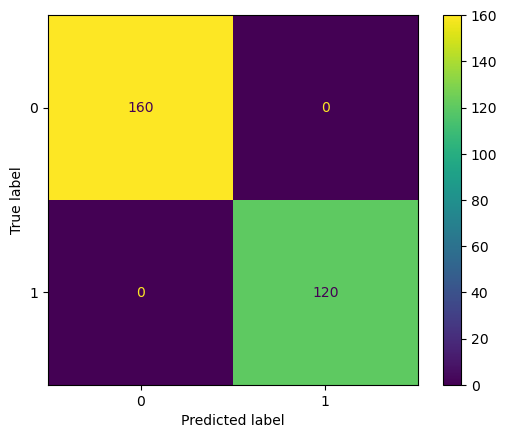

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       160\n           1       1.00      1.00      1.00       120\n\n    accuracy                           1.00       280\n   macro avg       1.00      1.00      1.00       280\nweighted avg       1.00      1.00      1.00       280\n'

In [81]:
ConfusionMatrixDisplay.from_predictions(y_train, pred_train_gini)
plt.show()
classification_report(y_train, pred_train_gini)

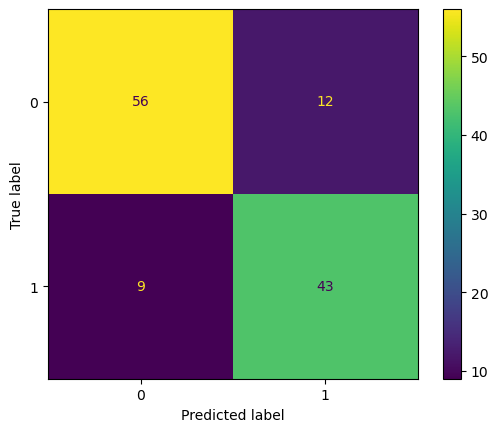

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_test_gini)
plt.show()
classification_report(y_test, pred_test_gini)

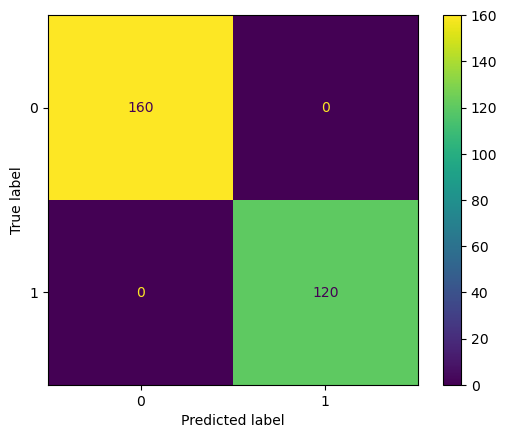

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       160\n           1       1.00      1.00      1.00       120\n\n    accuracy                           1.00       280\n   macro avg       1.00      1.00      1.00       280\nweighted avg       1.00      1.00      1.00       280\n'

In [83]:
ConfusionMatrixDisplay.from_predictions(y_train, pred_train_entropy)
plt.show()
classification_report(y_train, pred_train_entropy)

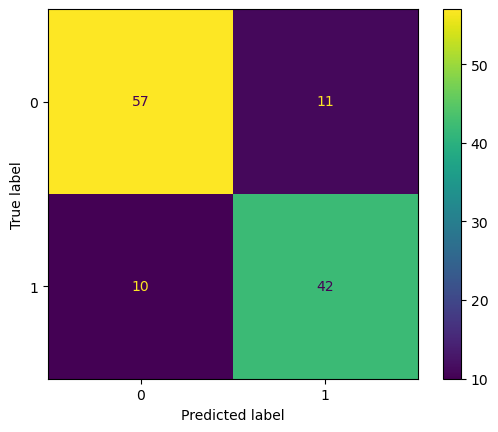

'              precision    recall  f1-score   support\n\n           0       0.85      0.84      0.84        68\n           1       0.79      0.81      0.80        52\n\n    accuracy                           0.82       120\n   macro avg       0.82      0.82      0.82       120\nweighted avg       0.83      0.82      0.83       120\n'

In [84]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_test_entropy)
plt.show()
classification_report(y_test, pred_test_entropy)

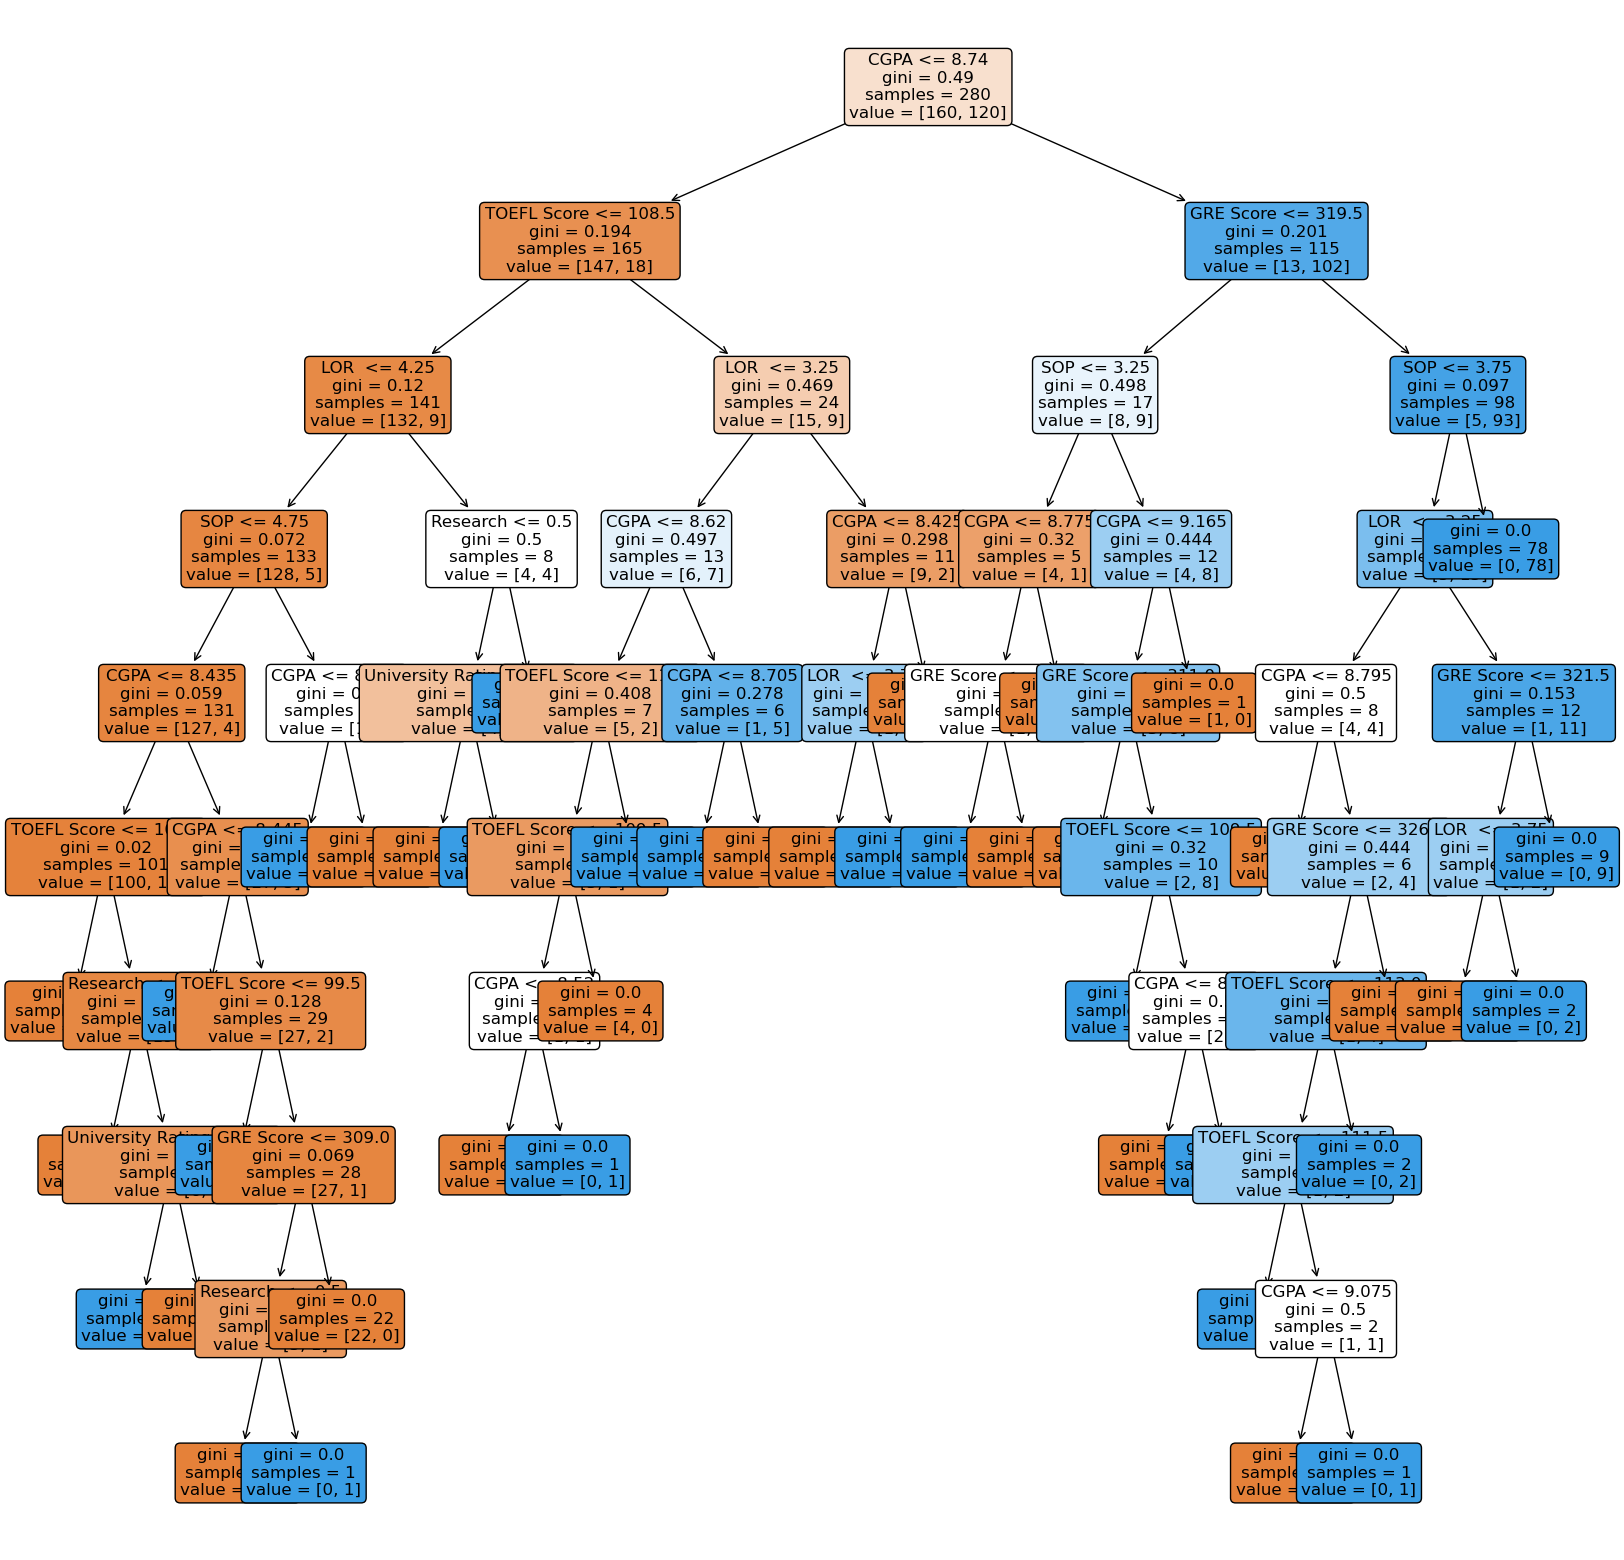

In [92]:
plt.figure(figsize=(20, 20))
plot_tree(gini_classifier, feature_names= list(x.columns), filled = True, rounded = True, fontsize = 12)
plt.show()

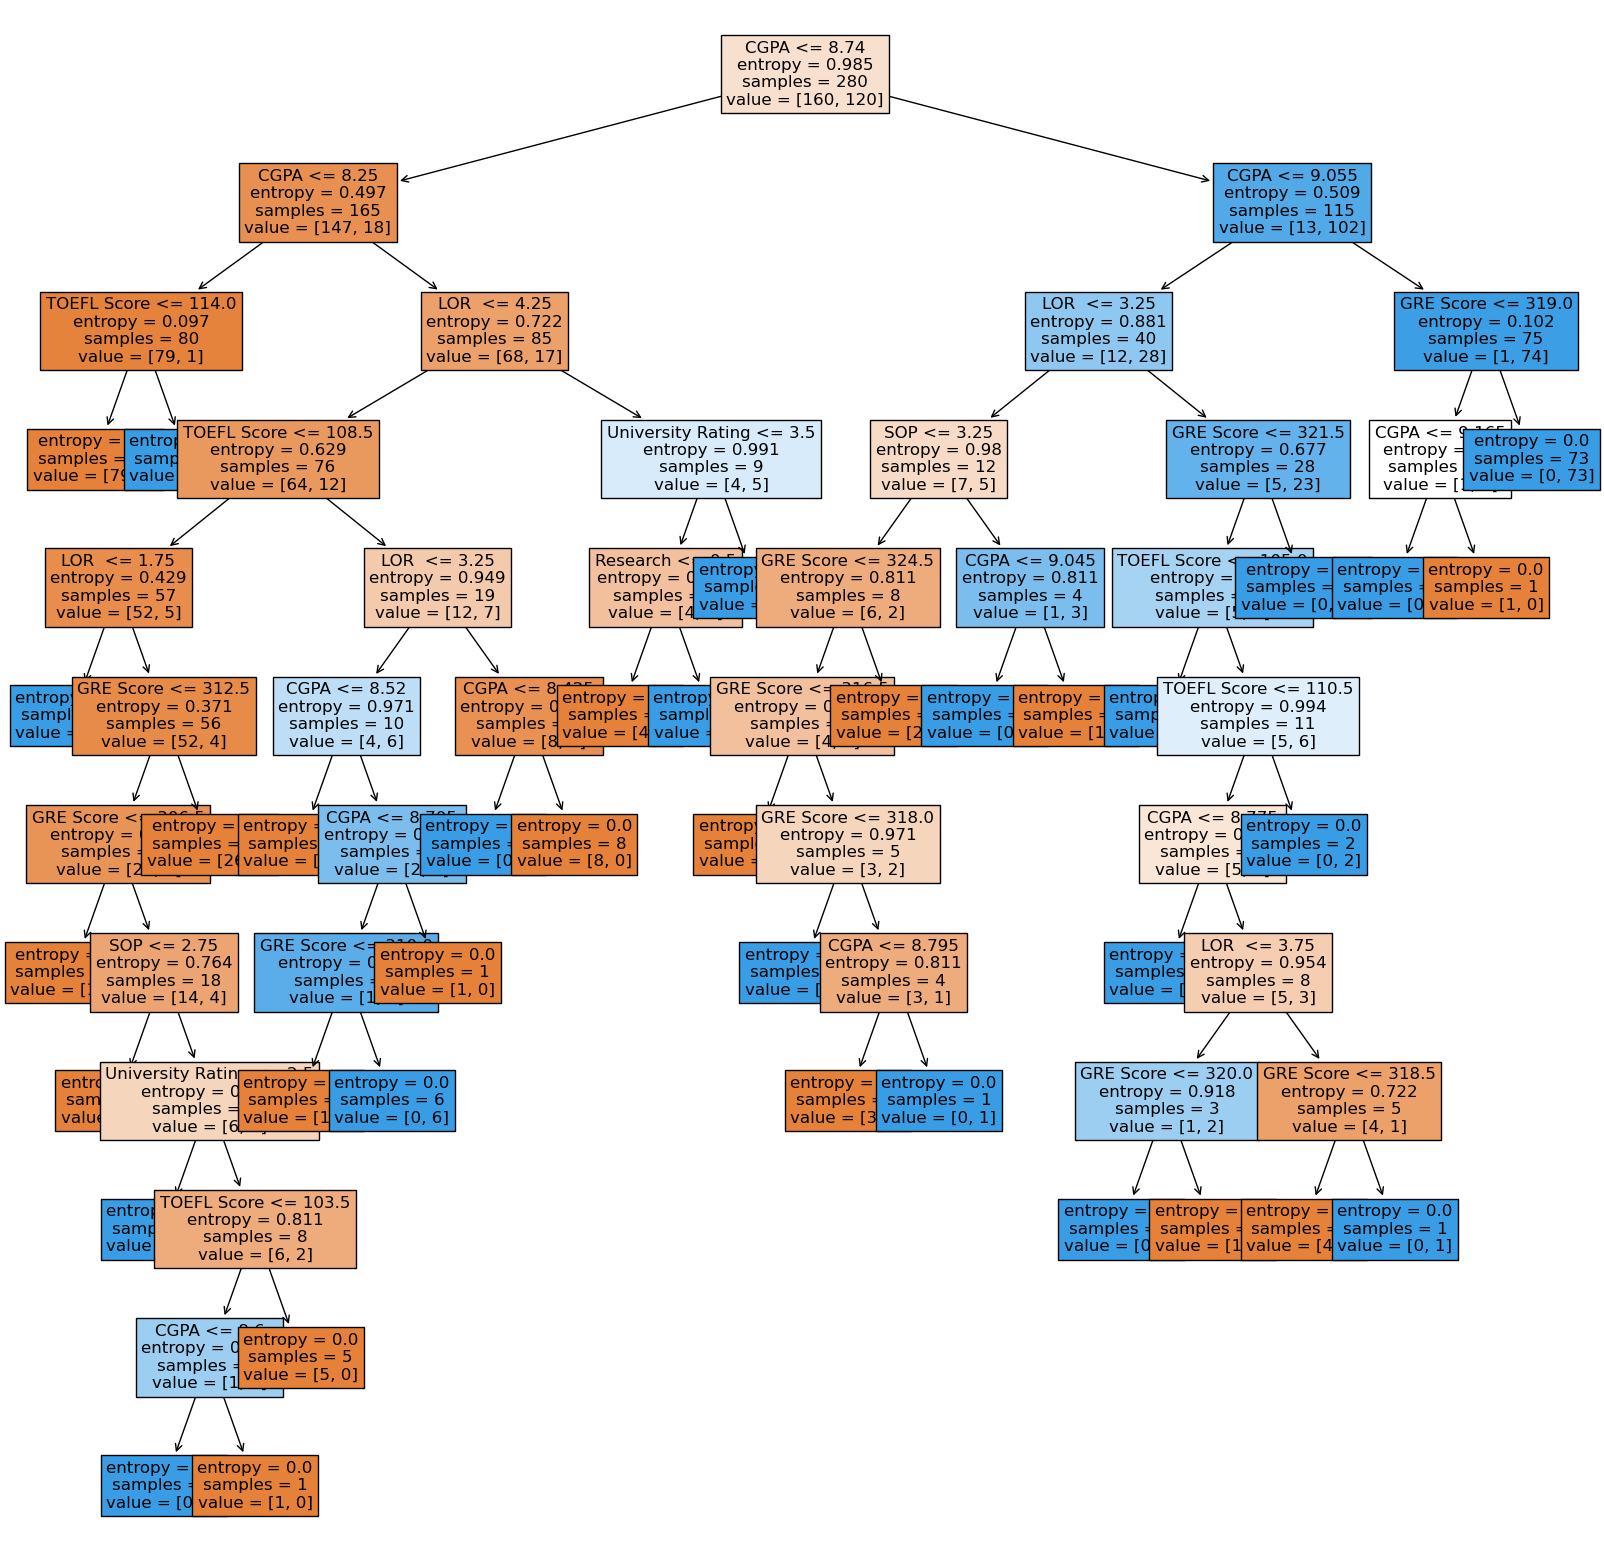

In [94]:
plt.figure(figsize=(20, 20))
plot_tree(entropy_classifier, feature_names = list(x.columns), filled = True, fontsize = 12)
plt.show()